In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
matplotlib.style.use('ggplot')

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# Feature engineering

In [2]:
# 读取训练集和测试集为 DataFrame
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# 基于 Predict_Survival.ipynb 类似的操作
train_data = train_data.drop(['PassengerId', 'Ticket'], axis=1)
# train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

In [5]:
# 获取名字中的 Title
def get_name_title(name):
    if name.find('Mr.') != -1:
        return 'Mr'
    elif name.find('Mrs.') != -1:
        return 'Mrs'
    elif name.find('Miss.') != -1:
        return 'Miss'
    elif name.find('Master.') != -1:
        return 'Master'
    elif name.find('Don.') != -1:
        return 'Don'
    elif name.find('Rev.') != -1:
        return 'Rev'
    elif name.find('Dr.') != -1:
        return 'Dr'
    elif name.find('Mme.') != -1:
        return 'Mme'
    elif name.find('Ms.') != -1:
        return 'Ms'
    elif name.find('Major.') != -1:
        return 'Major'
    elif name.find('Lady.') != -1:
        return 'Lady'
    elif name.find('Sir.') != -1:
        return 'Sir'
    elif name.find('Mlle.') != -1:
        return 'Mlle'
    elif name.find('Col.') != -1:
        return 'Col'
    elif name.find('Capt.') != -1:
        return 'Capt'
    elif name.find('Countess.') != -1:
        return 'Countess'
    elif name.find('Jonkheer.') != -1:
        return 'Jonkheer'
    else:
        return 'None'

# 添加 Title 字段
train_data['Title'] = train_data['Name'].apply(get_name_title)
train_data = train_data.drop('Name', axis=1)

test_data['Title'] = test_data['Name'].apply(get_name_title)
test_data = test_data.drop('Name', axis=1)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
Title       891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [8]:
# Fare 票价可能和等级 Pclass 和登录的船舱 Embarked 有关
grouped = train_data.groupby(['Pclass', 'Embarked', 'Sex'])
grouped_median_data = grouped.median()
grouped_median_data

Survived    Age  SibSp  Parch     Fare
Pclass Embarked Sex                                           
1      C        female       1.0  37.00    0.0    0.0  83.1583
                male         0.0  36.50    0.0    0.0  61.6792
       Q        female       1.0  33.00    1.0    0.0  90.0000
                male         0.0  44.00    2.0    0.0  90.0000
       S        female       1.0  33.00    0.5    0.0  79.6500
                male         0.0  42.00    0.0    0.0  35.0000
2      C        female       1.0  22.00    1.0    0.0  24.0000
                male         0.0  29.50    0.5    0.0  25.8604
       Q        female       1.0  30.00    0.0    0.0  12.3500
                male         0.0  57.00    0.0    0.0  12.3500
       S        female       1.0  29.00    0.0    0.0  23.0000
                male         0.0  30.00    0.0    0.0  13.0000
3      C        female       1.0  14.25    0.0    1.0  14.4583
                male         0.0  26.00    0.0    0.0   7.2292
       Q        female       1.0  20.00    0.0    0.0   7.7500
                male         0.0  27.00    0.0    0.0   7.7500
       S        female       0.0  23.00    1.0    0.0  14.4500
                male         0.0  25.00    0.0    0.0   8.0500

In [9]:
train_data[train_data.Fare.isnull()]

test_data[test_data.Fare.isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
152,1044,3,male,60.5,0,0,NaN,NaN,S,Mr


In [10]:
test_data.Fare.fillna(25, inplace=True)

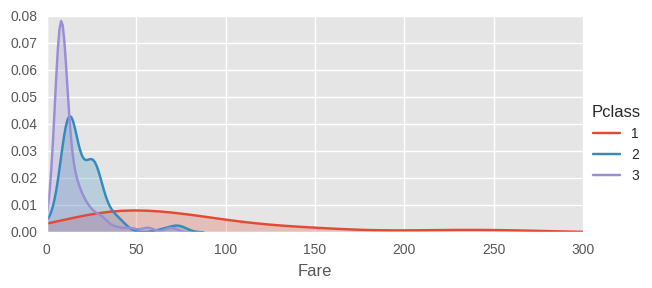

In [11]:
# 对比发现，三等舱Pclass=3 的 Fare 票价有 7.2500 、21.0750、31.2750，Pclass=2,1中也包含！！
# 所以需要 Fare / Pclass 使价格区分更明显！！
# print train_data[['Pclass','Fare']].groupby(['Pclass'],as_index=False).mean()
# print "========= Pclass = 1, Fare =========="
# print train_data[train_data['Pclass'] == 1]['Fare'].head(10)
# print "========= Pclass = 2, Fare =========="
# print train_data[train_data['Pclass'] == 2]['Fare'].head(10)
# print "========= Pclass = 3, Fare =========="
# print train_data[train_data['Pclass'] == 3]['Fare'].head(10)

# 查看 fare 和 pclass 的分布情况
facet = sns.FacetGrid(train_data, hue="Pclass",aspect=2)
# 拟合和绘制一元或二元概率密度分布
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, 300))
facet.add_legend()

In [12]:
train_data['Fare_bins'] = pd.qcut(train_data['Fare'], 4)
train_data[['Fare_bins','Survived']].groupby(['Fare_bins'],as_index=False).mean()

,Fare_bins,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


In [13]:
train_data.drop('Fare_bins', axis=1, inplace=True)

def map_fare_bins(fare):
    if 0 <= fare <= 7.91:
        return 1;
    elif 7.91 <= fare <= 14.454:
        return 2;
    elif 14.454 <= fare <= 31:
        return 3;
    else:
        return 4;
    
train_data['Fare_bin'] = train_data['Fare'].map(map_fare_bins)
test_data['Fare_bin'] = test_data['Fare'].map(map_fare_bins)

In [14]:
train_data['fare_per_pclass'] = train_data['Fare'].div(train_data['Pclass'])
test_data['fare_per_pclass'] = test_data['Fare'].div(test_data['Pclass'])

train_data.drop('Fare', axis=1, inplace=True)
test_data.drop('Fare', axis=1, inplace=True)

In [15]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title,Fare_bin,fare_per_pclass
0,0,3,male,22.0,1,0,NaN,S,Mr,1,2.416667
1,1,1,female,38.0,1,0,C85,C,Mrs,4,71.283300
2,1,3,female,26.0,0,0,NaN,S,Miss,2,2.641667
3,1,1,female,35.0,1,0,C123,S,Mrs,4,53.100000
4,0,3,male,35.0,0,0,NaN,S,Mr,2,2.683333


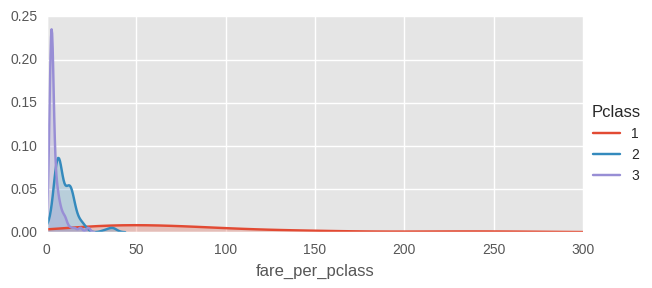

In [16]:
# 查看 fare 和 pclass 的分布情况
facet = sns.FacetGrid(train_data, hue="Pclass",aspect=2)
# 拟合和绘制一元或二元概率密度分布
facet.map(sns.kdeplot,'fare_per_pclass',shade= True)
facet.set(xlim=(0, 300))
facet.add_legend()

In [17]:
# 测试集和训练集合并
combined_train_data = train_data.drop('Survived', axis=1).append(test_data.drop('PassengerId', axis=1))
combined_train_data.reset_index(inplace=True)
combined_train_data.drop('index', axis=1, inplace=True)
combined_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Pclass             1309 non-null int64
Sex                1309 non-null object
Age                1046 non-null float64
SibSp              1309 non-null int64
Parch              1309 non-null int64
Cabin              295 non-null object
Embarked           1307 non-null object
Title              1309 non-null object
Fare_bin           1309 non-null int64
fare_per_pclass    1309 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 102.3+ KB


In [18]:
combined_train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title,Fare_bin,fare_per_pclass
0,3,male,22.0,1,0,NaN,S,Mr,1,2.416667
1,1,female,38.0,1,0,C85,C,Mrs,4,71.283300
2,3,female,26.0,0,0,NaN,S,Miss,2,2.641667
3,1,female,35.0,1,0,C123,S,Mrs,4,53.100000
4,3,male,35.0,0,0,NaN,S,Mr,2,2.683333


In [19]:
# Processing the ages
grouped = combined_train_data.groupby(['Sex','Pclass','Title'])
grouped.median()

Age  SibSp  Parch  Fare_bin  fare_per_pclass
Sex    Pclass Title                                                  
female 1      Countess  33.0    0.0    0.0       4.0        86.500000
              Dr        49.0    0.0    0.0       3.0        25.929200
              Lady      48.0    1.0    0.0       4.0        39.600000
              Miss      30.0    0.0    0.0       4.0       108.654150
              Mlle      24.0    0.0    0.0       4.0        59.402100
              Mme       24.0    0.0    0.0       4.0        69.300000
              Mrs       45.0    1.0    0.0       4.0        78.266700
              None      39.0    0.0    0.0       4.0       108.900000
       2      Miss      20.0    0.0    0.0       3.0        10.125000
              Mrs       30.5    1.0    0.0       3.0        13.000000
              Ms        28.0    0.0    0.0       2.0         6.500000
       3      Miss      18.0    0.0    0.0       2.0         2.683333
              Mrs       31.0    1.0    1.0       3.0         5.166667
              Ms         NaN    0.0    0.0       1.0         2.583333
male   1      Capt      70.0    1.0    1.0       4.0        71.000000
              Col       54.5    0.0    0.0       3.5        32.000000
              Don       40.0    0.0    0.0       3.0        27.720800
              Dr        47.0    1.0    0.0       4.0        81.858300
              Jonkheer  38.0    0.0    0.0       1.0         0.000000
              Major     48.5    0.0    0.0       3.0        28.525000
              Master     6.0    1.0    2.0       4.0       134.500000
              Mr        41.5    0.0    0.0       4.0        47.100000
              Sir       49.0    1.0    0.0       4.0        56.929200
       2      Dr        38.5    0.0    0.0       2.0         6.125000
              Master     2.0    1.0    1.0       3.0        13.000000
              Mr        30.0    0.0    0.0       2.0         6.500000
              Rev       41.5    0.0    0.0       2.0         6.500000
       3      Master     6.0    3.0    1.0       3.0         7.452767
              Mr        26.0    0.0    0.0       1.0         2.631933

In [20]:
def fill_missed_age(row):
    if row['Sex']=='female' and row['Pclass'] == 1:
        if row['Title'] == 'Countess':
            return 33
        elif row['Title'] == 'Dr':
            return 49
        elif row['Title'] == 'Lady':
            return 48
        elif row['Title'] == 'Miss':
            return 30
        elif row['Title'] == 'Mlle':
            return 24
        elif row['Title'] == 'Mme':
            return 24
        elif row['Title'] == 'Mrs':
            return 45
        elif row['Title'] == 'None':
            return 39
    
    elif row['Sex']=='female' and row['Pclass'] == 2:
        if row['Title'] == 'Miss':
            return 20
        elif row['Title'] == 'Ms':
            return 28
        elif row['Title'] == 'Mrs':
            return 31
        
    elif row['Sex']=='female' and row['Pclass'] == 3:
        if row['Title'] == 'Miss':
            return 18
        elif row['Title'] == 'Ms':
            return 28
        elif row['Title'] == 'Mrs':
            return 31
        
    elif row['Sex']=='male' and row['Pclass'] == 1:
        if row['Title'] == 'Capt':
            return 70
        elif row['Title'] == 'Col':
            return 55
        elif row['Title'] == 'Don':
            return 40
        elif row['Title'] == 'Dr':
            return 47
        elif row['Title'] == 'Jonkheer':
            return 38
        elif row['Title'] == 'Major':
            return 49
        elif row['Title'] == 'Master':
            return 6
        elif row['Title'] == 'Mr':
            return 42
        elif row['Title'] == 'Sir':
            return 50
    
    elif row['Sex']=='male' and row['Pclass'] == 2:
        if row['Title'] == 'Dr':
            return 39
        elif row['Title'] == 'Master':
            return 2
        elif row['Title'] == 'Mr':
            return 30
        elif row['Title'] == 'Rev':
            return 42
        
    elif row['Sex']=='male' and row['Pclass'] == 3:
        if row['Title'] == 'Master':
            return 6
        elif row['Title'] == 'Mr':
            return 26
            
combined_train_data['Age'] = combined_train_data.apply(lambda row : fill_missed_age(row)
                                                      if np.isnan(row['Age']) else row['Age'],
                                                       axis=1)

In [21]:
combined_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Pclass             1309 non-null int64
Sex                1309 non-null object
Age                1309 non-null float64
SibSp              1309 non-null int64
Parch              1309 non-null int64
Cabin              295 non-null object
Embarked           1307 non-null object
Title              1309 non-null object
Fare_bin           1309 non-null int64
fare_per_pclass    1309 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 102.3+ KB


In [22]:
# 填充缺失的 Embarked
combined_train_data['Embarked'] = combined_train_data['Embarked'].fillna('S')

In [23]:
combined_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Pclass             1309 non-null int64
Sex                1309 non-null object
Age                1309 non-null float64
SibSp              1309 non-null int64
Parch              1309 non-null int64
Cabin              295 non-null object
Embarked           1309 non-null object
Title              1309 non-null object
Fare_bin           1309 non-null int64
fare_per_pclass    1309 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 102.3+ KB


In [24]:
combined_train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title,Fare_bin,fare_per_pclass
0,3,male,22.0,1,0,NaN,S,Mr,1,2.416667
1,1,female,38.0,1,0,C85,C,Mrs,4,71.283300
2,3,female,26.0,0,0,NaN,S,Miss,2,2.641667
3,1,female,35.0,1,0,C123,S,Mrs,4,53.100000
4,3,male,35.0,0,0,NaN,S,Mr,2,2.683333


In [25]:
# 处理 Cabin 字段及填补缺失的 Cabin 字段
# 缺失字段填充为 U (for Uknown)
combined_train_data.Cabin.fillna('U',inplace=True)
# 获取船舱的首字母
combined_train_data['Cabin'] = combined_train_data['Cabin'].map(lambda c : c[0])

In [26]:
# 处理 SibSp 和 Parch 字段，添加FamilySize、Singleton、SmallFamily、LargeFamily字段，保留原始字段
combined_train_data['FamilySize'] = combined_train_data['SibSp']+combined_train_data['Parch']+1

combined_train_data['Singleton'] = combined_train_data['FamilySize'].map(lambda s : 1 if s == 1 else 0)
combined_train_data['SmallFamily'] = combined_train_data['FamilySize'].map(lambda s : 1 if 2<=s<=4 else 0)
combined_train_data['LargeFamily'] = combined_train_data['FamilySize'].map(lambda s : 1 if 5<=s else 0)

In [27]:
combined_train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title,Fare_bin,fare_per_pclass,FamilySize,Singleton,SmallFamily,LargeFamily
0,3,male,22.0,1,0,U,S,Mr,1,2.416667,2,0,1,0
1,1,female,38.0,1,0,C,C,Mrs,4,71.283300,2,0,1,0
2,3,female,26.0,0,0,U,S,Miss,2,2.641667,1,1,0,0
3,1,female,35.0,1,0,C,S,Mrs,4,53.100000,2,0,1,0
4,3,male,35.0,0,0,U,S,Mr,2,2.683333,1,1,0,0


In [28]:
# `Cabin` dummy encoding 
embarked_dummies = pd.get_dummies(combined_train_data['Cabin'], prefix='Cabin')
combined_train_data = pd.concat([combined_train_data, embarked_dummies], axis=1)
combined_train_data.drop('Cabin',axis=1,inplace=True)

In [29]:
# `Embarked` dummy encoding 
embarked_dummies = pd.get_dummies(combined_train_data['Embarked'], prefix='Embarked')
combined_train_data = pd.concat([combined_train_data, embarked_dummies], axis=1)
combined_train_data.drop('Embarked',axis=1,inplace=True)

In [30]:
# `Title` dummy encoding 
title_dummies = pd.get_dummies(combined_train_data['Title'], prefix='Title')
combined_train_data = pd.concat([combined_train_data, title_dummies], axis=1)
combined_train_data.drop('Title',axis=1,inplace=True)

In [31]:
combined_train_data['Sex'] = combined_train_data['Sex'].map({'male':1,'female':0})

In [32]:
# `Fare_bin` dummy encoding 
Fare_bin_dummies = pd.get_dummies(combined_train_data['Fare_bin'], prefix='Fare_bin')
combined_train_data = pd.concat([combined_train_data, Fare_bin_dummies], axis=1)
combined_train_data.drop('Fare_bin',axis=1,inplace=True)

In [33]:
#  对于 Pclass，只是个等级标记，所以也应该进行 dummy encoding 
# `Pclass` dummy encoding 
pclass_dummies = pd.get_dummies(combined_train_data['Pclass'], prefix='Pclass')
combined_train_data = pd.concat([combined_train_data, pclass_dummies], axis=1)
combined_train_data.drop('Pclass',axis=1,inplace=True)

In [34]:
combined_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 46 columns):
Sex                1309 non-null int64
Age                1309 non-null float64
SibSp              1309 non-null int64
Parch              1309 non-null int64
fare_per_pclass    1309 non-null float64
FamilySize         1309 non-null int64
Singleton          1309 non-null int64
SmallFamily        1309 non-null int64
LargeFamily        1309 non-null int64
Cabin_A            1309 non-null uint8
Cabin_B            1309 non-null uint8
Cabin_C            1309 non-null uint8
Cabin_D            1309 non-null uint8
Cabin_E            1309 non-null uint8
Cabin_F            1309 non-null uint8
Cabin_G            1309 non-null uint8
Cabin_T            1309 non-null uint8
Cabin_U            1309 non-null uint8
Embarked_C         1309 non-null uint8
Embarked_Q         1309 non-null uint8
Embarked_S         1309 non-null uint8
Title_Capt         1309 non-null uint8
Title_Col          1309 non-nul

In [35]:
combined_train_data.shape

(1309, 46)

In [36]:
combined_train_data.head()

,Sex,Age,SibSp,Parch,fare_per_pclass,FamilySize,Singleton,SmallFamily,LargeFamily,Cabin_A,...,Title_None,Title_Rev,Title_Sir,Fare_bin_1,Fare_bin_2,Fare_bin_3,Fare_bin_4,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,2.416667,2,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,38.0,1,0,71.283300,2,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,26.0,0,0,2.641667,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,35.0,1,0,53.100000,2,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,35.0,0,0,2.683333,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [37]:
# feature scale
from sklearn.preprocessing import MinMaxScaler

scaler_data = MinMaxScaler().fit_transform(combined_train_data[['Age','fare_per_pclass', 'FamilySize']])
combined_train_data['Age'] = scaler_data[:, 0]
combined_train_data['fare_per_pclass'] = scaler_data[:, 1]
combined_train_data['FamilySize'] = scaler_data[:, 2]
combined_train_data.head()

,Sex,Age,SibSp,Parch,fare_per_pclass,FamilySize,Singleton,SmallFamily,LargeFamily,Cabin_A,...,Title_None,Title_Rev,Title_Sir,Fare_bin_1,Fare_bin_2,Fare_bin_3,Fare_bin_4,Pclass_1,Pclass_2,Pclass_3
0,1,0.273456,1,0,0.004717,0.1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0.473882,1,0,0.139136,0.1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0.323563,0,0,0.005156,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0.436302,1,0,0.103644,0.1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,0.436302,0,0,0.005238,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [38]:
# 分割得到训练集和测试集
train_X = combined_train_data.ix[:890]
train_Y = train_data.Survived

test_X = combined_train_data.ix[891:]

In [39]:
train_X.shape, train_Y.shape, test_X.shape

((891, 46), (891,), (418, 46))

# Modeling

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=100)
clf.fit(train_X, train_Y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [41]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = train_X.columns
feature_importance['importance'] = clf.feature_importances_

feature_importance.sort(['importance'], ascending=False)

,feature,importance
1,Age,0.189450
4,fare_per_pclass,0.146864
0,Sex,0.114885
33,Title_Mr,0.109158
30,Title_Miss,0.044591
34,Title_Mrs,0.039711
45,Pclass_3,0.037914
17,Cabin_U,0.030322
8,LargeFamily,0.022927
5,FamilySize,0.019588


In [42]:
selectModel = SelectFromModel(clf, prefit=True, threshold=0.001)
train_X_new = selectModel.transform(train_X)
test_X_new = selectModel.transform(test_X)

In [43]:
train_X_new.shape, test_X_new.shape

((891, 35), (418, 35))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

# 随机森林模型的超参数选择
forest = RandomForestClassifier()

forest_parameter_grid = {
                 'max_depth' : [3,4,5,6,7,8,9],
                 'n_estimators': [60, 80, 100,140,180,200,240],
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(train_Y, n_folds=5)

forest_grid_search = GridSearchCV(forest,
                           param_grid=forest_parameter_grid,
                           cv=cross_validation)

forest_grid_search.fit(train_X_new, train_Y)

print('Best score: {}'.format(forest_grid_search.best_score_))
print('Best parameters: {}'.format(forest_grid_search.best_params_))

forest_predictions = forest_grid_search.predict(test_X_new).astype(int)
submission = pd.DataFrame({
        "PassengerId": test_data['PassengerId'],
        "Survived": forest_predictions
    })

submission.to_csv("result/advance_forest_grid_search_predictions_1_31.csv", index=False)

print "RandomForestClassifier Done."

/home/sunnymarkliu/software/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/sunnymarkliu/software/miniconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
# GradientBoostingClassifier 模型的超参数选择
from sklearn.ensemble import GradientBoostingClassifier

gbc_parameter_grid = {
                 'learning_rate' : [0.001, 0.003, 0.009, 0.025, 0.075, 0.1, 0.3, 0.6, 0.8, 1, 1.2],
                 'max_depth' : [3,4,5,6,7,8],
                 'n_estimators': [100,140,180,200,240,280,300, 320],
                 'max_features' : ['sqrt','log2', None]
                 }

gbc = GradientBoostingClassifier()
gbc_grid_search = GridSearchCV(gbc,
                           param_grid=gbc_parameter_grid,
                           cv=cross_validation)

gbc_grid_search.fit(train_X_new, train_Y)

print('gbc Best score: {}'.format(gbc_grid_search.best_score_))
print('gbc Best parameters: {}'.format(gbc_grid_search.best_params_))

gbc_predictions = gbc_grid_search.predict(test_X_new).astype(int)
submission = pd.DataFrame({
        "PassengerId": test_data['PassengerId'],
        "Survived": gbc_predictions
    })

submission.to_csv("result/advance_gbc_grid_search_predictions_1_31.csv", index=False)

print "GradientBoostingClassifier Done."

In [ ]:
# XGBClassifier 模型的超参数选择
from xgboost import XGBClassifier

xgbc_parameter_grid = {
                 'learning_rate' : [0.001, 0.003, 0.009, 0.025, 0.075, 0.1, 0.3, 0.6, 0.8, 1, 1.2],
                 'max_depth' : [2,3,4,5,6,7,8,9,10],
                 'n_estimators': [100,140,180,200,240,280,320],
                 }

xgbc = XGBClassifier()
xgbc_grid_search = GridSearchCV(xgbc,
                           param_grid=xgbc_parameter_grid,
                           cv=cross_validation)

xgbc_grid_search.fit(train_X_new, train_Y)

print('xgbc Best score: {}'.format(xgbc_grid_search.best_score_))
print('xgbc Best parameters: {}'.format(xgbc_grid_search.best_params_))

xgb_predictions = xgbc_grid_search.predict(test_X_new).astype(int)
submission = pd.DataFrame({
        "PassengerId": test_data['PassengerId'],
        "Survived": xgb_predictions
    })

submission.to_csv("result/advance_xgbc_grid_search_predictions_1_31.csv", index=False)

print "XGBClassifier Done."

In [ ]:
# LogisticRegression 模型的超参数选择
from sklearn.linear_model import LogisticRegression

logistic_parameter_grid = {
                 'C' : [0.1,0.2,0.4, 0.8,1,1.5,2,4,6,8,10],
                 'max_iter': [50, 80, 100,120,140,160,180,200,220,240,260,280,300]
                 }

logistic = LogisticRegression()
logistic_grid_search = GridSearchCV(logistic,
                           param_grid=logistic_parameter_grid,
                           cv=cross_validation)

logistic_grid_search.fit(train_X_new, train_Y)

print('logistic Best score: {}'.format(logistic_grid_search.best_score_))
print('logistic Best parameters: {}'.format(logistic_grid_search.best_params_))

logistic_predictions = logistic_grid_search.predict(test_X_new).astype(int)
submission = pd.DataFrame({
        "PassengerId": test_data['PassengerId'],
        "Survived": logistic_predictions
    })

submission.to_csv("result/advance_logistic_grid_search_predictions_1_31.csv", index=False)

print "LogisticRegression Done."

In [ ]:
# AdaBoostClassifier 模型的超参数选择
from sklearn.ensemble import AdaBoostClassifier

adaboost_parameter_grid = {
                 'learning_rate' : [0.001, 0.025, 0.075, 0.1, 0.3, 0.6, 0.8, 1, 1.2],
                 'n_estimators': [50,80,100,120,140,160,180,200,220,240,260,280]
                 }

adaboost = AdaBoostClassifier()
adaboost_grid_search = GridSearchCV(adaboost,
                           param_grid=adaboost_parameter_grid,
                           cv=cross_validation)

adaboost_grid_search.fit(train_X_new, train_Y)

print('adaboost Best score: {}'.format(adaboost_grid_search.best_score_))
print('adaboost Best parameters: {}'.format(adaboost_grid_search.best_params_))

adaboost_predictions = adaboost_grid_search.predict(test_X_new).astype(int)
submission = pd.DataFrame({
        "PassengerId": test_data['PassengerId'],
        "Survived": adaboost_predictions
    })

submission.to_csv("result/advance_adaboost_grid_search_predictions_1_31.csv", index=False)

print "AdaBoostClassifier Done."

** GridSearch 获取的最佳模型参数如下：**
1. RandomForestClassifier
```
Best score: 0.833894500561
Best parameters: {'n_estimators': 180, 'criterion': 'gini', 'max_depth': 3}
```

2. GradientBoostingClassifier
```
Best score: 0.847362514029
Best parameters: {'max_features': None, 'n_estimators': 200, 'learning_rate': 0.075, 'max_depth': 4}
```

3. XGBClassifier
```
Best score: 0.845117845118
Best parameters: {'n_estimators': 320, 'learning_rate': 0.075, 'max_depth': 3}
```

4. LogisticRegression
```
Best score: 0.83164983165
Best parameters: {'C': 1, 'max_iter': 50}
```

5. AdaBoostClassifier
```
Best score: 0.828282828283
Best parameters: {'n_estimators': 140, 'learning_rate': 0.1}
```

In [ ]:
# ensemble and voting predict
from sklearn.ensemble import VotingClassifier

# best params model
forest = RandomForestClassifier(n_estimators=180, criterion='gini', max_depth=3)
gradientBoosting = GradientBoostingClassifier(max_features=None, n_estimators=200, learning_rate=0.075,
                                              max_depth=4)
xgb = XGBClassifier(n_estimators=320, learning_rate=0.075, max_depth=3)
logistic = LogisticRegression(C=1, max_iter=50)
adaBoost = AdaBoostClassifier(n_estimators=140, learning_rate=0.1)

voting = VotingClassifier(estimators=[
        ('forest', forest), ('gradientBoosting', gradientBoosting), 
        ('xgb', xgb), ('logistic', logistic), 
        ('adaBoost', adaBoost)], voting='soft')

voting = voting.fit(train_X_new, train_Y)
predictions = voting.predict(test_X_new)

submission = pd.DataFrame({
        "PassengerId": test_data['PassengerId'],
        "Survived": predictions
    })

submission.to_csv("result/advance_voting_predictions_1_31.csv", index=False)

print "Voting Done."